# Loan Approval Classification Dataset

## **Dataset Description**
The Loan Approval Classification Dataset contains information about loan applicants, including their demographic, financial, and credit-related details. The primary goal is to predict whether a loan application will be approved or rejected.

---

## **Columns and Descriptions**

| **Column Name**                  | **Description**                                               | **Type**         |
|----------------------------------|---------------------------------------------------------------|------------------|
| `person_age`                     | Age of the applicant                                          | Float           |
| `person_gender`                  | Gender of the applicant                                       | Categorical      |
| `person_education`               | Highest level of education attained                          | Categorical      |
| `person_income`                  | Annual income of the applicant (in currency units)           | Float           |
| `person_emp_exp`                 | Years of employment experience                               | Integer          |
| `person_home_ownership`          | Home ownership status (e.g., rent, own, mortgage)            | Categorical      |
| `loan_amnt`                      | Loan amount requested                                         | Float           |
| `loan_intent`                    | Purpose of the loan                                           | Categorical      |
| `loan_int_rate`                  | Interest rate of the loan                                    | Float           |
| `loan_percent_income`            | Loan amount as a percentage of annual income                 | Float           |
| `cb_person_cred_hist_length`     | Length of credit history in years                            | Float           |
| `credit_score`                   | Credit score of the applicant                                | Integer          |
| `previous_loan_defaults_on_file` | Indicator of any previous loan defaults (Yes/No)             | Categorical      |
| `loan_status`                    | Loan approval status (1 = Approved, 0 = Rejected) (Target)   | Integer          |

---

## **Key Points**
- **Target Variable**: `loan_status` (binary classification: 1 = approved, 0 = rejected)
- **Feature Types**:
- **Applications**:
  - Predicting loan approvals for financial institutions.
  - Understanding the key factors influencing loan approval decisions.

---

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from scipy import stats
from IPython.display import display
from feature_engine.outliers import OutlierTrimmer

/home/logiceat3r/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Reading the Dataset

In [2]:
df = pd.read_csv("data.csv")


# Data Preprocessing

## Getting insights and information about the dataset

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

### Changing the data type of the age from float64 to int 

In [5]:
df['person_age'] = df['person_age'].astype('int')

In [6]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [7]:
df['person_gender'].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

### Loan status is inbalanced, so we are going to choose f1-score as one of our main evaluation metric

In [8]:
df["loan_status"].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

# Seperate Numerical Columns and Cetegorical columns

In [9]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.pop()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
Categorical Columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


### Plots a Seaborn histogram for a given categorical column in the dataset.
    
    Parameters:
    - column (str): The name of the categorical column.
    - df (pd.DataFrame): The DataFrame containing the data.


In [10]:
def plot_categorical_histogram(column, df):
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.countplot(data=df, x=column, palette="viridis", order=df[column].value_counts().index)
    plt.title(f"Distribution of {column}", fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Ensure everything fits
    plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add a grid for readability
    plt.show()

Plotting for: person_gender


/tmp/ipykernel_41084/3254813913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis", order=df[column].value_counts().index)


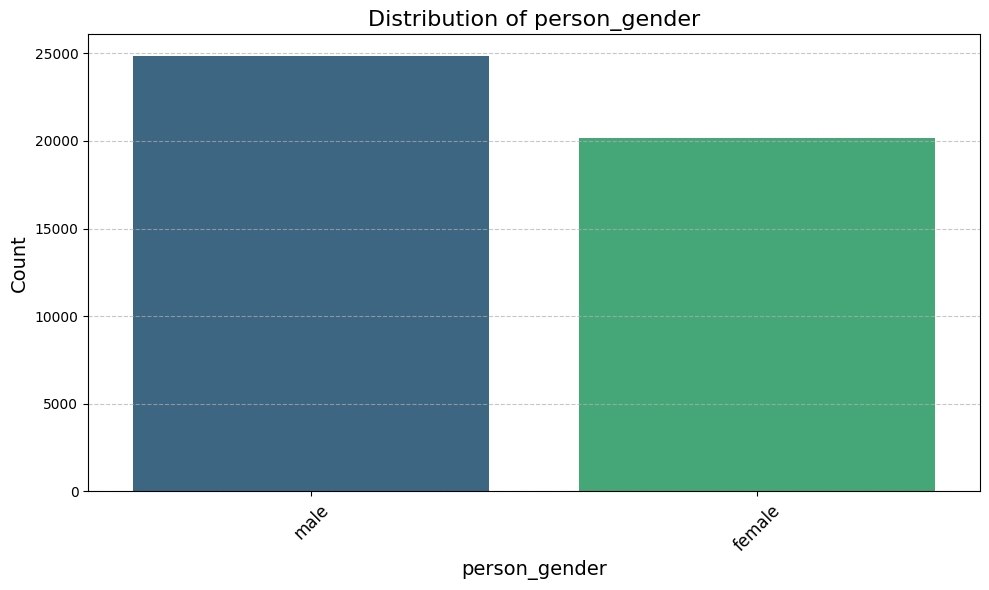

'---------------'

Plotting for: person_education


/tmp/ipykernel_41084/3254813913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis", order=df[column].value_counts().index)


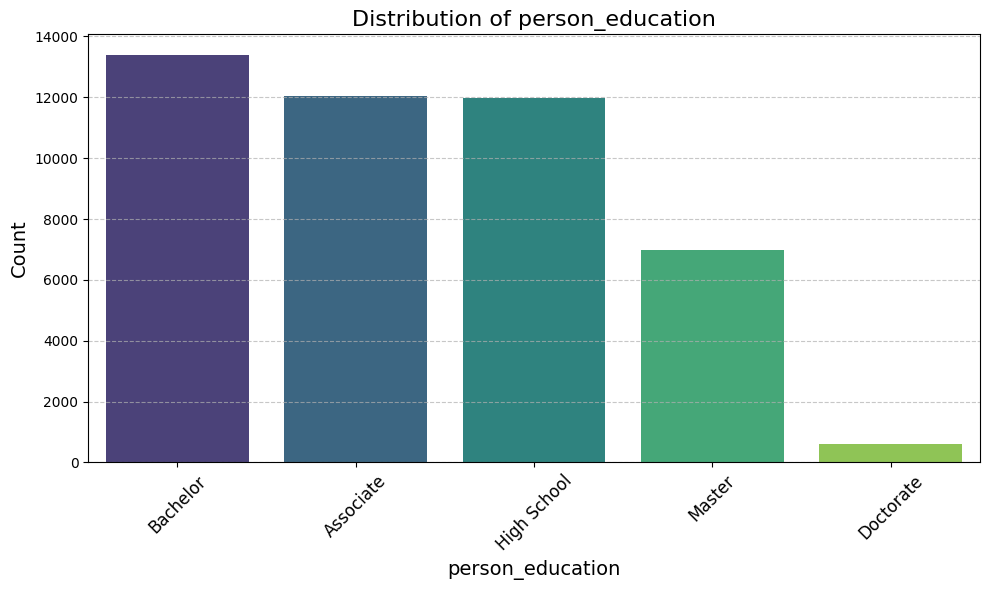

'---------------'

Plotting for: person_home_ownership


/tmp/ipykernel_41084/3254813913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis", order=df[column].value_counts().index)


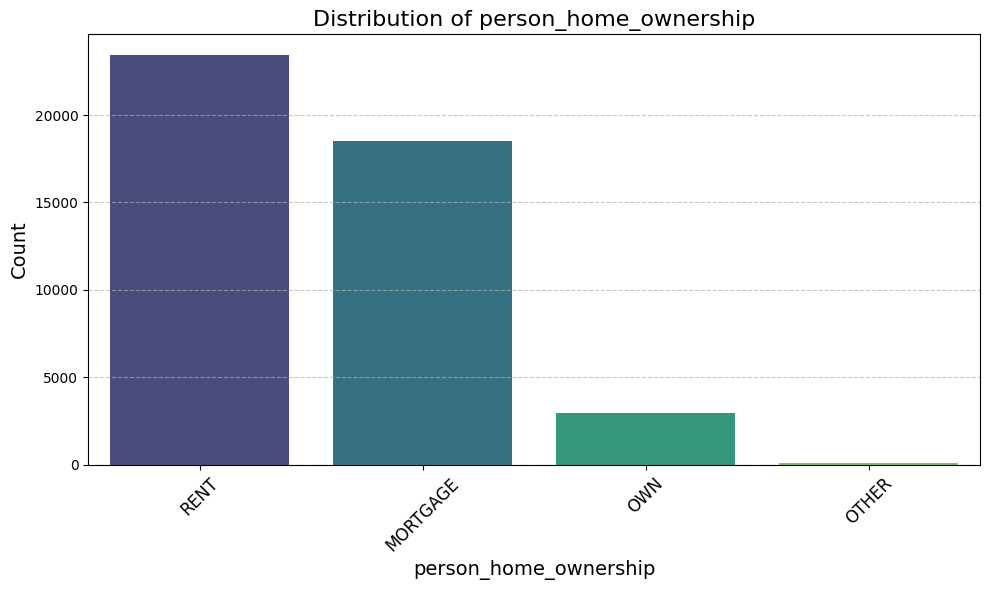

'---------------'

Plotting for: loan_intent


/tmp/ipykernel_41084/3254813913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis", order=df[column].value_counts().index)


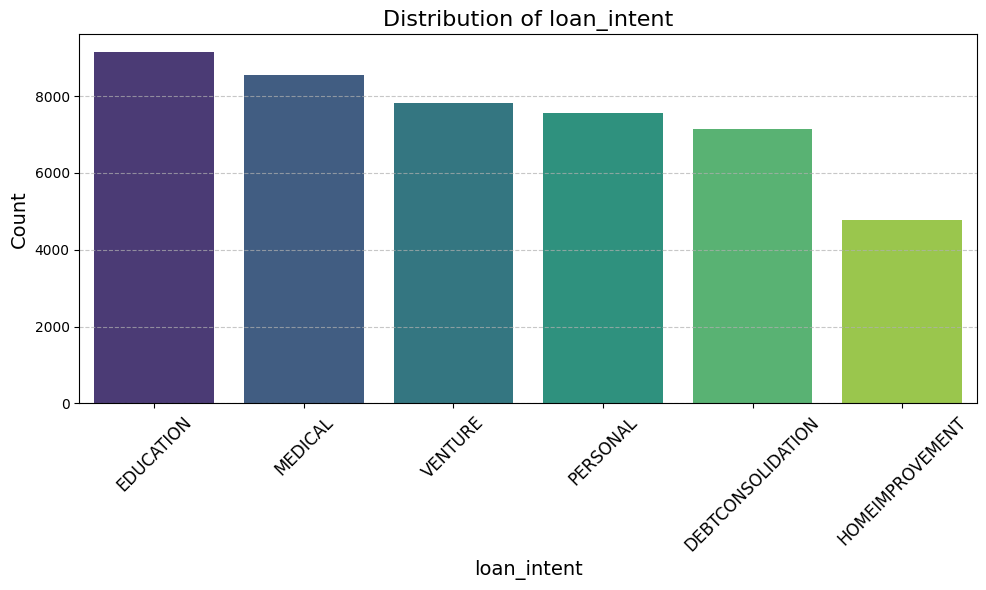

'---------------'

Plotting for: previous_loan_defaults_on_file


/tmp/ipykernel_41084/3254813913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis", order=df[column].value_counts().index)


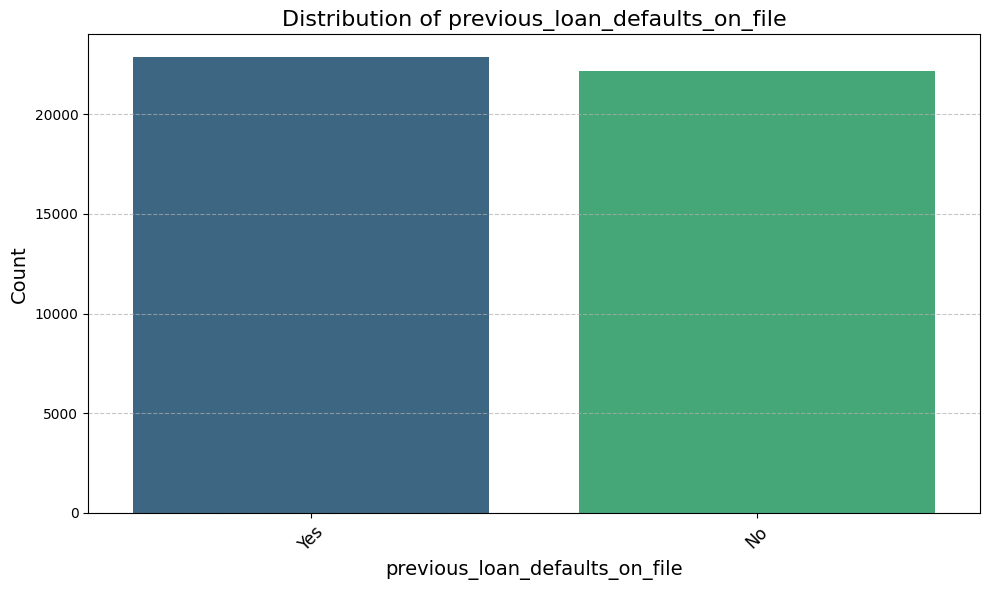

'---------------'

In [11]:
for column in categorical_columns:
    print(f"Plotting for: {column}")
    plot_categorical_histogram(column, df)
    display("---------------")  # Ensures separation between cells

### Checking the ratios of approved to disapproved loans 

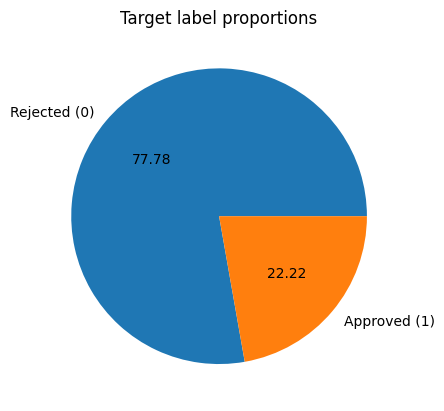

In [12]:
label_prop = df['loan_status'].value_counts()

plt.pie(label_prop.values, labels=['Rejected (0)', 'Approved (1)'], autopct='%.2f')
plt.title('Target label proportions')
plt.show()

### plotting a boxplot and histplot for all of the numerical columns

    - The Data is mostly skewed and there are too many outliers to handle

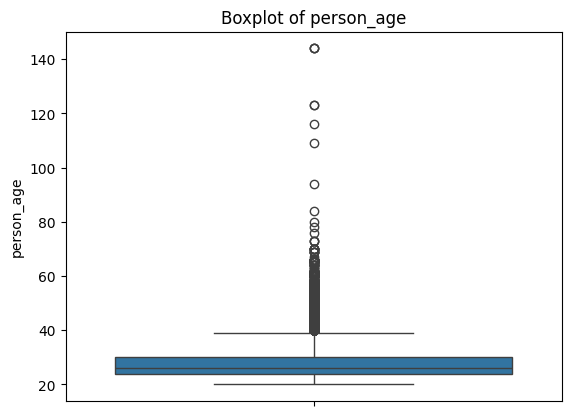

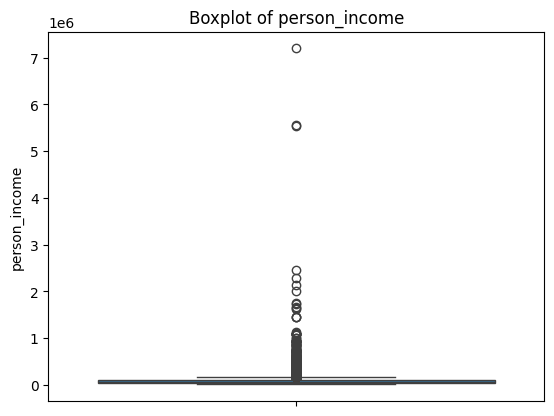

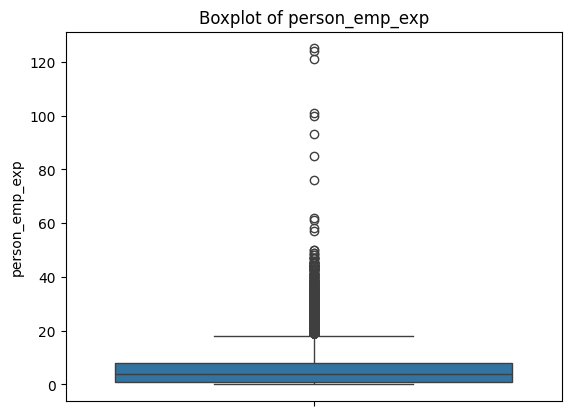

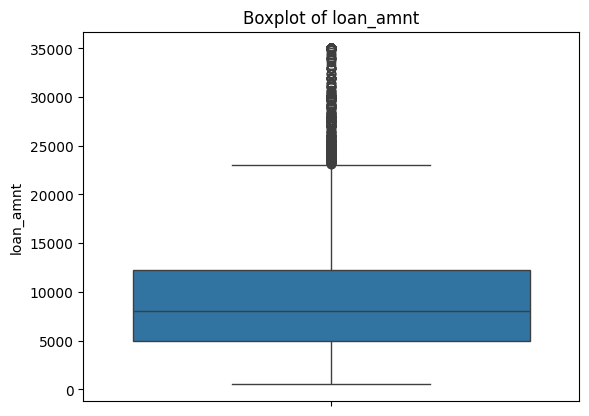

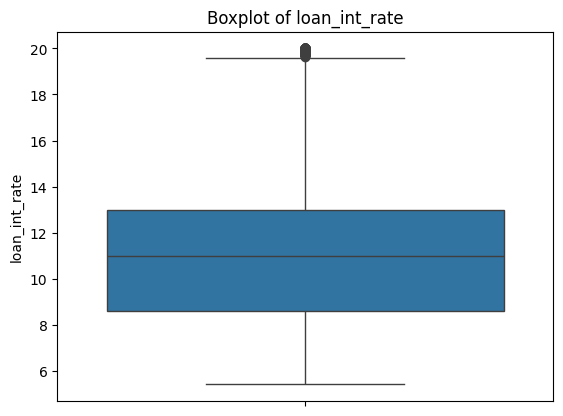

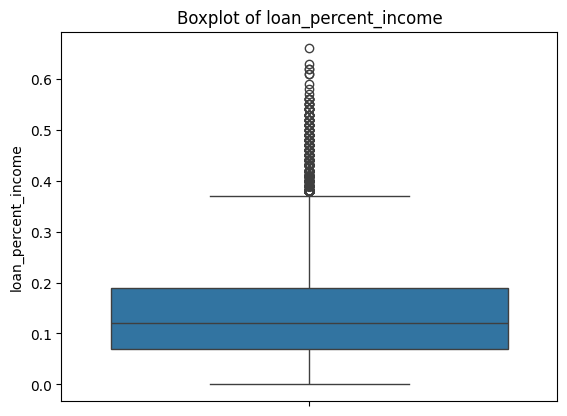

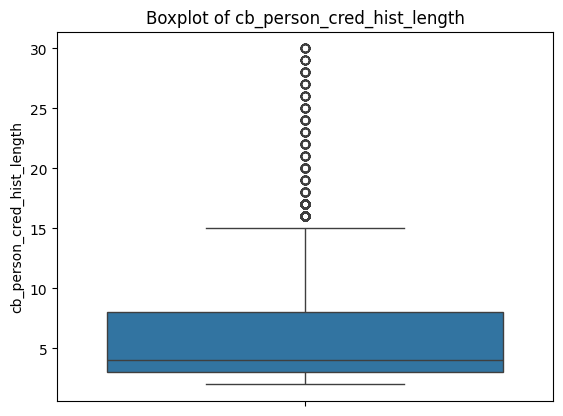

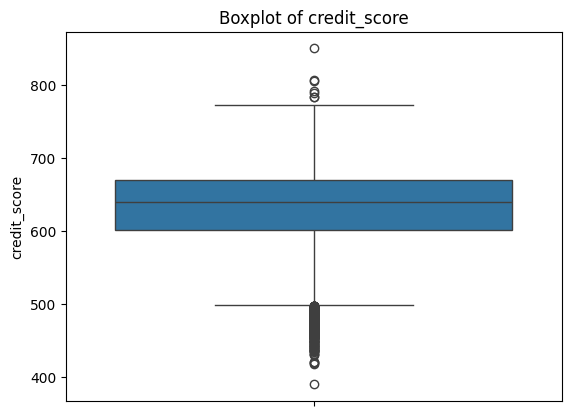

In [13]:
for col in numerical_columns:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### The histograms show skewed distribution and only the credit score is the normally distribuited feature (nearly)

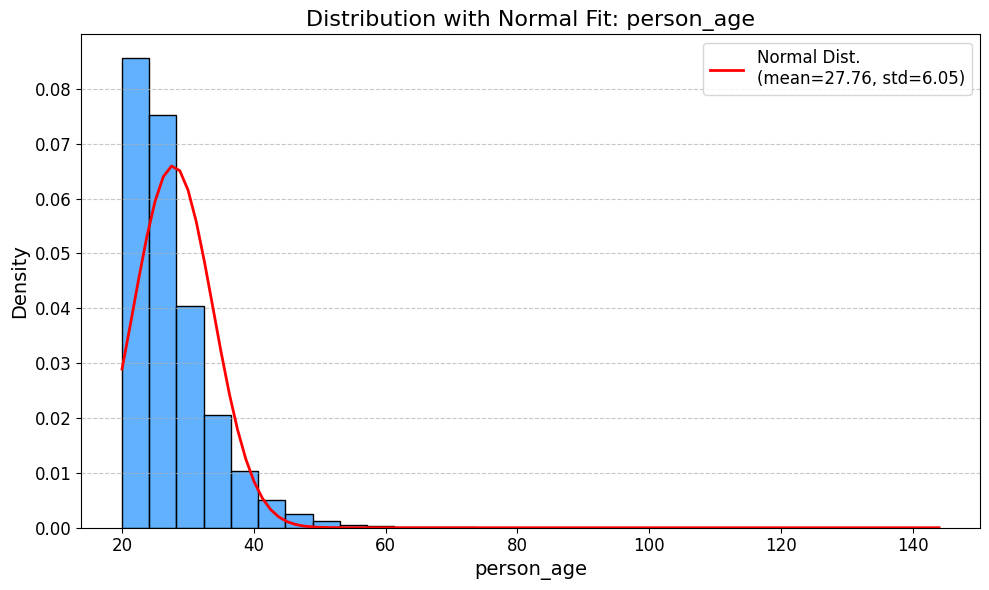

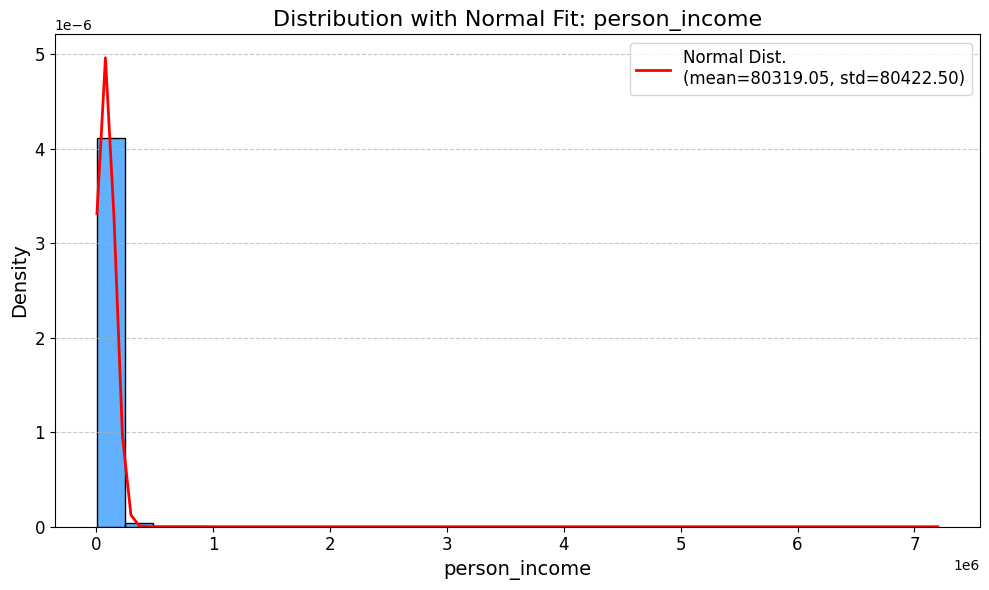

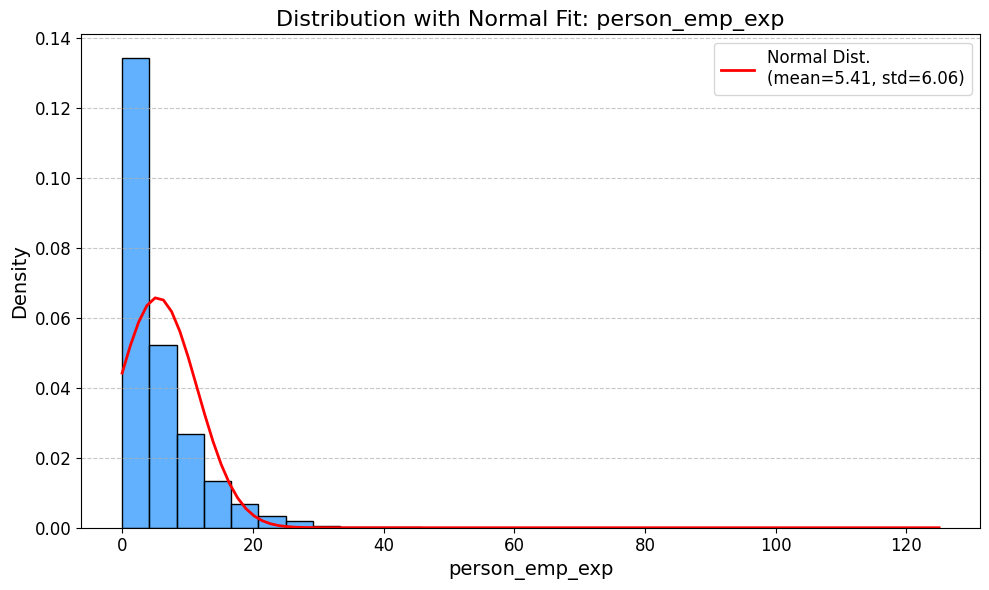

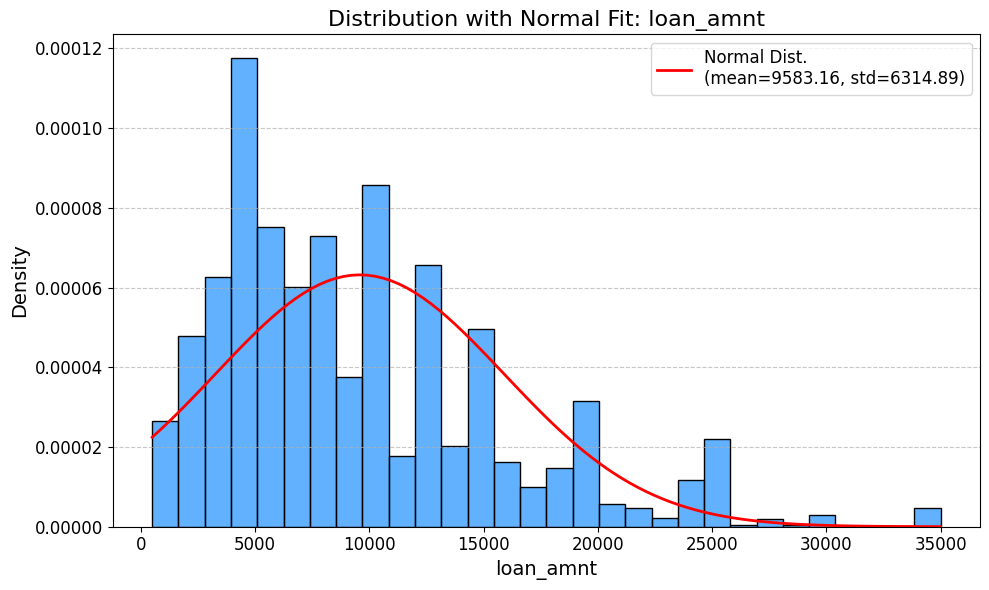

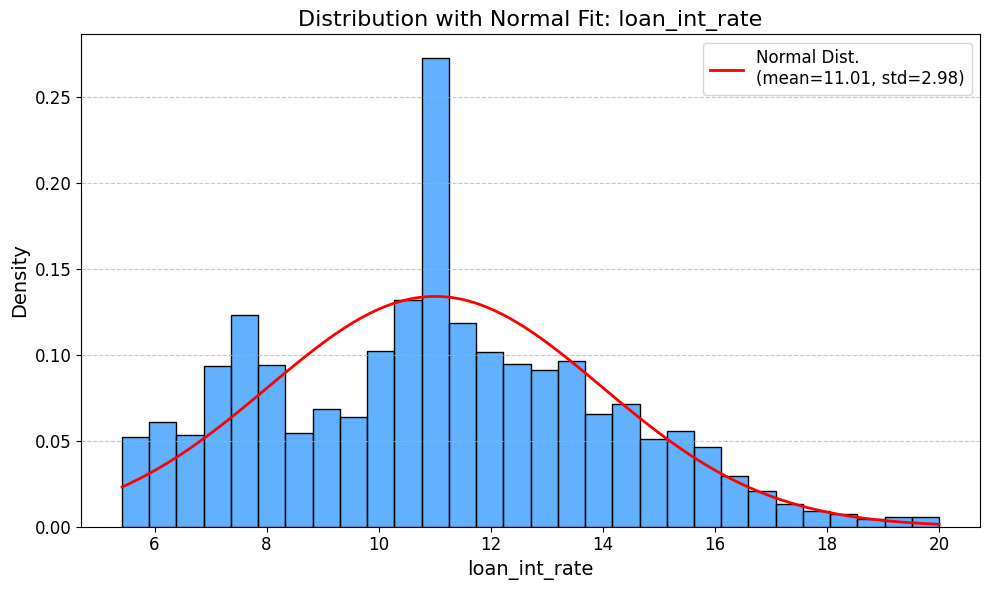

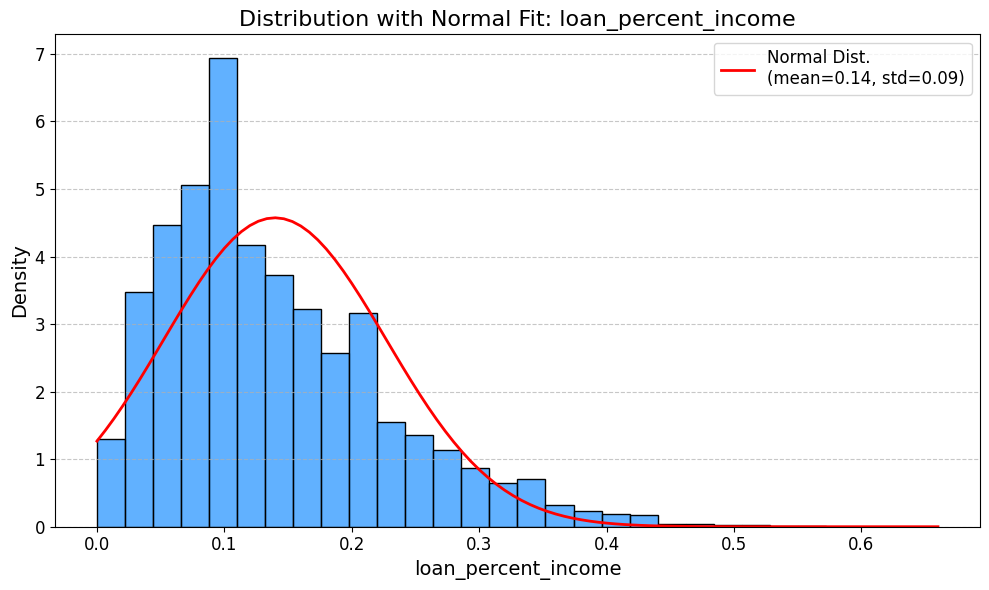

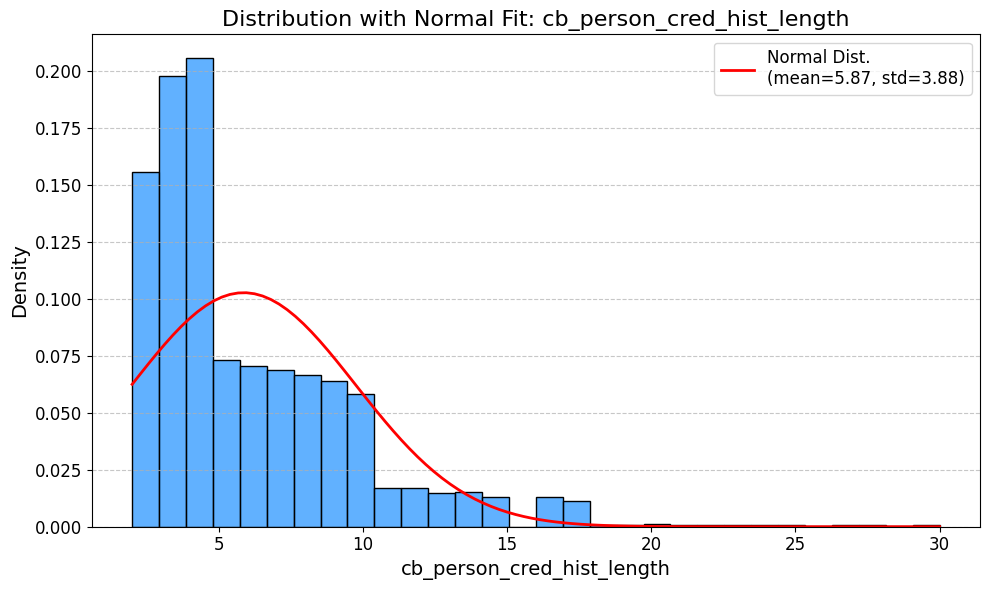

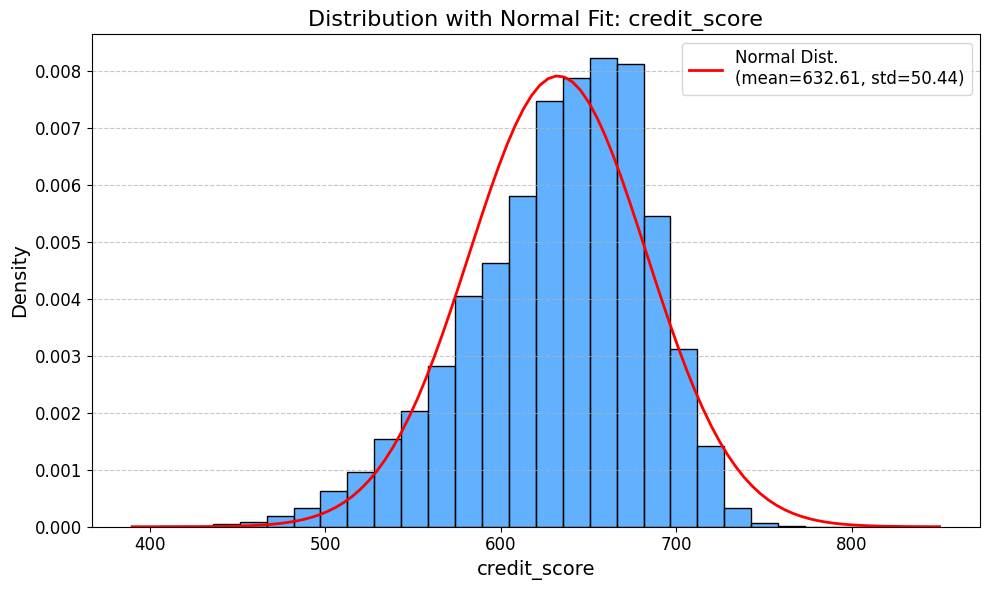

In [14]:

for col in numerical_columns:
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Plot the histogram of the column
    sns.histplot(data=df, x=col, kde=False, color="dodgerblue", bins=30, edgecolor="black", alpha=0.7, stat='density')

    # Fit a normal distribution to the data
    mean, std = df[col].mean(), df[col].std()  # Calculate mean and standard deviation
    x = np.linspace(df[col].min(), df[col].max(), 100)  # Generate x-values for the normal curve
    y = norm.pdf(x, mean, std)  # Generate the normal PDF values

    # Plot the normal distribution curve
    plt.plot(x, y, color="red", linewidth=2, label=f"Normal Dist.\n(mean={mean:.2f}, std={std:.2f})")

    # Add titles and labels
    plt.title(f'Distribution with Normal Fit: {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add gridlines
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)  # Add a legend for the normal curve
    plt.tight_layout()  # Ensure everything fits well
    plt.show()


### Correlation matrix
    -- Strong corrleation between person_income and person_age (0.95)
    -- Strong cb_person_cred_hist_length and person_age (0.86)
    -- Mid correlation between loan_percent_income and loan_amount (0.59)
    -- Interesting correlation between loan_status and loan_percent_amount (0.38)
    -- Interesting corrleation betweeen loan_int_rate and loan_status (0.33)

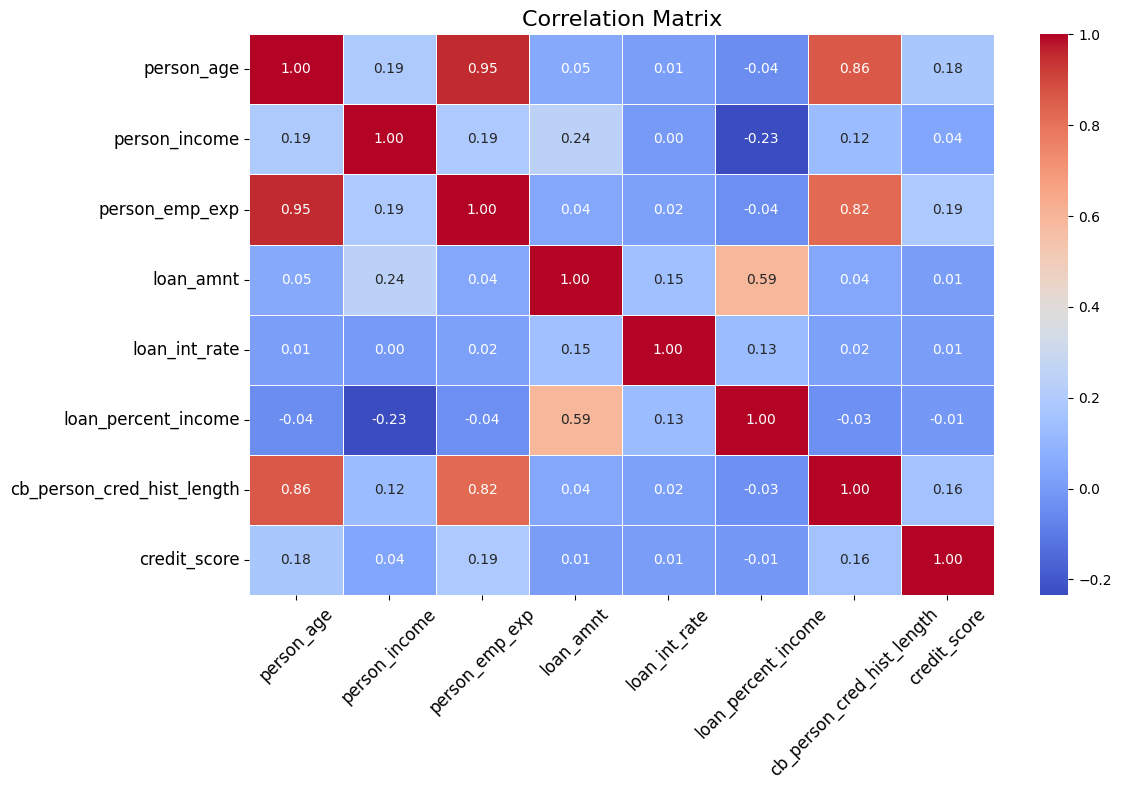

In [15]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

# Data Cleaning

### Handle categorical variables with label encoding

In [16]:
gender_mapping = {'male': 0, 'female': 1}
home_ownership_mapping = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3}
loan_intent_mapping = {'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5}
previous_loan_defaults_mapping = {'No': 0, 'Yes': 1}
person_education_mapping = { 'High School': 0,'Associate': 1,'Bachelor': 2,'Master': 3,'Doctorate':4}


df['person_gender'] = df['person_gender'].map(gender_mapping)
df['person_home_ownership'] = df['person_home_ownership'].map(home_ownership_mapping)
df['loan_intent'] = df['loan_intent'].map(loan_intent_mapping)
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map(previous_loan_defaults_mapping)
df["person_education"] = df["person_education"].map(person_education_mapping)


In [17]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,1,3,71948.0,0,0,35000.0,0,16.02,0.49,3.0,561,0,1
1,21,1,0,12282.0,0,1,1000.0,1,11.14,0.08,2.0,504,1,0
2,25,1,0,12438.0,3,2,5500.0,2,12.87,0.44,3.0,635,0,1
3,23,1,2,79753.0,0,0,35000.0,2,15.23,0.44,2.0,675,0,1
4,24,0,3,66135.0,1,0,35000.0,2,14.27,0.53,4.0,586,0,1


### Trim the outliers using IQR 

In [18]:
def iqr_outlier_trimmer(data):
    data = np.array(data)
    
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    return filtered_data


for column in df.columns:
    df[column] = iqr_outlier_trimmer(df[column])

ValueError: Length of values (42812) does not match length of index (45000)

In [ ]:
for col in numerical_columns:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Standardize the datasets using min_max  scaler

In [ ]:
skewed_threshold = 1.0  
for col in df.columns:
    skewness = stats.skew(df[col])
    if abs(skewness) > skewed_threshold:
        print(f"{col} is skewed (skewness: {skewness})")
    else:
        print(f"{col} is normal (skewness: {skewness})")

for col in df.columns:
    skewness = stats.skew(df[col])
    if abs(skewness) > skewed_threshold:
        df[col] = np.log1p(df[col])
    else:
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[[col]])

df.head()

In [ ]:

for col in numerical_columns:
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Plot the histogram of the column
    sns.histplot(data=df, x=col, kde=False, color="dodgerblue", bins=30, edgecolor="black", alpha=0.7, stat='density')

    # Fit a normal distribution to the data
    mean, std = df[col].mean(), df[col].std()  # Calculate mean and standard deviation
    x = np.linspace(df[col].min(), df[col].max(), 100)  # Generate x-values for the normal curve
    y = norm.pdf(x, mean, std)  # Generate the normal PDF values

    # Plot the normal distribution curve
    plt.plot(x, y, color="red", linewidth=2, label=f"Normal Dist.\n(mean={mean:.2f}, std={std:.2f})")

    # Add titles and labels
    plt.title(f'Distribution with Normal Fit: {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add gridlines
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)  # Add a legend for the normal curve
    plt.tight_layout()  # Ensure everything fits well
    plt.show()


In [ ]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()